TIP 50 - USAGE
-------------
SciPy builds on top of NumPy to provide common tools for scientific programming, such as

linear algebra

numerical integration

interpolation

optimization

distributions and random number generation

signal processing

We review a few tools below, and further documentation is here: http://docs.scipy.org/doc/scipy/reference/index.html


TIP 51 - STATISTICS
----------------

The ```scipy.stats``` subpackage supplies

numerous random variable objects (densities, cumulative distributions, random sampling, etc.)

some estimation procedures

some statistical tests

Since ```numpy.random``` provides functions for generating random variables, the following generates a draw from the distribution below when $a, b = 5, 5$,

$$f(x;a,b) = \frac{x^{(a-1)}(1-x)^{(b-1)}}{\int_0^1 u^{(a-1)}u^{(b-1)} du}, (0\leq x \leq 1)$$

In [2]:
import numpy as np
np.random.beta(5, 5, size=3)

array([ 0.43039428,  0.40279601,  0.6787842 ])

However, sometimes we need access to the density itself, or the cdf, the quantiles, etc.

For this we can use ```scipy.stats```, which provides all of this functionality as well as random number generation in a single consistent interface.

Here’s an example of usage:

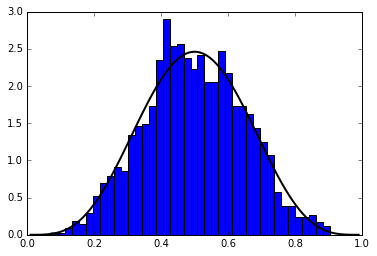

In [4]:
%matplotlib inline 
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
fig.show()

In this code we created a so-called ```rv_frozen object```, via the call ```q = beta(5, 5)```.

The “frozen” part of the notation implies that ```q``` represents a particular distribution with a particular set of parameters.

Once we’ve done so, we can then generate random numbers, evaluate the density, etc., all from this fixed distribution.

In [5]:
q.cdf(0.4)      # Cumulative distribution function

0.26656768000000003

In [6]:
q.pdf(0.4)      # Density function

2.0901888000000013

In [7]:
q.ppf(0.8)      # Quantile (inverse cdf) function

0.63391348346427079

In [8]:
q.mean()

0.5

TIP 52 - TRANSFORMATIONS
-----------------

The general syntax for creating these objects is 

```identifier = scipy.stats.distribution_name(shape_parameters)``` 

where distribution_name is one of the distribution names in ```scipy.stats```.

Note there are also two keyword arguments, ```loc``` and ```scale```:

```identifier = scipy.stats.distribution_name(shape_parameters, loc=c, scale=d)```

These transform the original random variable $X$ into $Y=c+dX$

TIP 53 - LINEAR REGRESSION
---------------

```scipy.stats.linregress``` implements simple linear regression:

In [9]:
from scipy.stats import linregress
x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.9904550198077111, 0.018604869615215406)

TIP 54 - ROOTS AND FIXED POINTS
-------------
Consider the function $f(x) = sin(4(x-1/4))+x+x^{20} -1$:

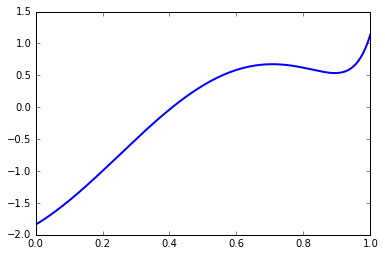

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 1, 200)
y = np.sin(4*(x-.25)) + x + x**20 - 1
plt.plot(x, y, 'b-', linewidth=2)
plt.show()

There are various numerical methods for finding the roots. Firstly, the bisection method:

In [11]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if f(middle) > 0:  
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

import numpy as np
def f(x):
    return np.sin(4*(x-.25)) + x + x**20 - 1

bisect(f,0,1)

0.408294677734375

In fact SciPy provides it’s own bisection function, which we now test:

In [12]:
from scipy.optimize import bisect
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
bisect(f, 0, 1)

0.4082935042797544

Another very common root-finding algorithm is the Newton-Raphson method. In SciPy this algorithm is implemented by ```scipy.newton```.

The Newton-Raphson method uses local slope information, and when the function is well-behaved, the Newton-Raphson method is faster. But when the function is less well-behaved, the Newton-Raphson might fail.

In [13]:
from scipy.optimize import newton
newton(f, 0.2)   # Start the search at initial condition x = 0.2

0.40829350427935679

Using IPython’s ```timeit magic```, we see that newton can be much faster:

In [14]:
timeit bisect(f, 0, 1)

10000 loops, best of 3: 120 µs per loop


In [15]:
timeit newton(f, 0.2)

10000 loops, best of 3: 29.5 µs per loop


TIP 55 - HYBRID METHODS
-----------

The Newton-Raphson method is fast but not robust (and relies on choosing a "good" starting point), the bisection algorithm is robust but relatively slow. Without specific function knowledge, the algorithm choice involves a trade-off between speed of convergence and robustness. In practice, most default algorithms for root finding, optimization and fixed points use hybrid methods.

In ```scipy.optimize```, the function ```brentq``` is such a hybrid method, and a good default

In [18]:
from scipy.optimize import brentq
brentq(f, 0, 1)

0.40829350427936706

In [19]:
timeit brentq(f, 0, 1)

10000 loops, best of 3: 31 µs per loop


TIP 56 - FIXED POINTS
------------

SciPy has a function for finding (scalar) fixed points too.

If you don’t get good results, you can always switch back to the ```brentq``` root finder, since the fixed point of a function $f$ is the root of $g(x):=x−f(x)$.

In [20]:
from scipy.optimize import fixed_point
fixed_point(lambda x: x**2, 10.0)  # 10.0 is an initial guess

array(1.0)

TIP 57 - OPTIMIZATION

```fminbound``` is a numerical package for minimization. Maximization can be performed by recalling that the maximizer of a function $f$ is the minimizer of $−f$.

Minimization is closely related to root finding: for smooth functions, interior optima correspond to roots of the first derivative.

In [22]:
from scipy.optimize import fminbound
f = lambda x: x**2+2*x-7
fminbound(f, -5,5)  # Search in [-5,5]

-1.0

In [23]:
f(-1.0)

-8.0

TIP 57 - INTEGRATION
------------------

Numerical integration methods work by computing the integral of an approximating polynomial.

The resulting error depends on how well the polynomial fits the integrand, which in turn depends on how “regular” the integrand is.

In ```SciPy```, the relevant module for numerical integration is ```scipy.integrate``` and a good default for univariate integration is ```quad```.

In [24]:
from scipy.integrate import quad
integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

TIP 58 - LINEAR ALGEBRA
-------------

NumPy provides a module for linear algebra called ```linalg```.

SciPy also provides a module for linear algebra with the same name. The latter is not an exact superset of the former, but overall it has more functionality, see http://docs.scipy.org/doc/scipy/reference/linalg.html